In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from pandas import DataFrame
import sklearn
from pandas import DataFrame
from matplotlib import pyplot

In [27]:
import matplotlib as mt
axes= {"linewidth" : 3}
mt.rc("axes", **axes)
font={"weight": 'bold', "family": "Times new roman", "size": 16}
mt.rc("font", **font)

In [3]:
dataset=pd.read_excel("Combined data.xlsx")
dataset

,ΔX mulliken,rA/rC,ΔX Pauling,Delta,ΔH mixing,ΔS mixing,AIC,ΔP-rad,Phase formation
0,2.629500,0.437500,0.9280,0.063086,1.12,13.38,18.186440,2.01000,Single phase
1,2.624000,0.437500,0.9220,0.063086,-0.16,13.38,18.038570,1.99300,Single phase
2,2.543300,0.482759,0.9640,0.026537,-3.84,13.38,18.688520,1.96000,Single phase
3,2.533000,0.451613,1.0120,0.046064,-3.52,13.38,19.836200,2.02600,Single phase
4,2.629800,0.451613,1.0040,0.047429,-3.84,13.38,19.650520,1.98400,Single phase
...,...,...,...,...,...,...,...,...,...
287,2.099125,0.378378,0.7175,0.153609,-42.75,11.52,13.939362,2.02875,Multi phase
288,2.321625,0.500000,0.6550,0.030428,-22.25,11.52,12.309975,1.78625,Multi phase
289,2.414375,0.500000,0.6900,0.015890,-3.50,11.52,13.056875,1.87625,Multi phase
290,2.279875,0.482759,0.4825,0.040656,-6.00,11.52,8.866862,1.93000,Multi phase


In [4]:
df=dataset[["ΔX mulliken", 'rA/rC', 'ΔX Pauling', 'Delta', 'ΔH mixing', 'ΔS mixing']]
df

,ΔX mulliken,rA/rC,ΔX Pauling,Delta,ΔH mixing,ΔS mixing
0,2.629500,0.437500,0.9280,0.063086,1.12,13.38
1,2.624000,0.437500,0.9220,0.063086,-0.16,13.38
2,2.543300,0.482759,0.9640,0.026537,-3.84,13.38
3,2.533000,0.451613,1.0120,0.046064,-3.52,13.38
4,2.629800,0.451613,1.0040,0.047429,-3.84,13.38
...,...,...,...,...,...,...
287,2.099125,0.378378,0.7175,0.153609,-42.75,11.52
288,2.321625,0.500000,0.6550,0.030428,-22.25,11.52
289,2.414375,0.500000,0.6900,0.015890,-3.50,11.52
290,2.279875,0.482759,0.4825,0.040656,-6.00,11.52


             ΔX mulliken     rA/rC  ΔX Pauling     Delta  ΔH mixing  ΔS mixing
ΔX mulliken     1.000000 -0.431522    0.876337  0.295461   0.732875   0.012916
rA/rC          -0.431522  1.000000   -0.445616 -0.962012  -0.249760  -0.091829
ΔX Pauling      0.876337 -0.445616    1.000000  0.282081   0.624235  -0.020574
Delta           0.295461 -0.962012    0.282081  1.000000   0.135474   0.040865
ΔH mixing       0.732875 -0.249760    0.624235  0.135474   1.000000  -0.069208
ΔS mixing       0.012916 -0.091829   -0.020574  0.040865  -0.069208   1.000000


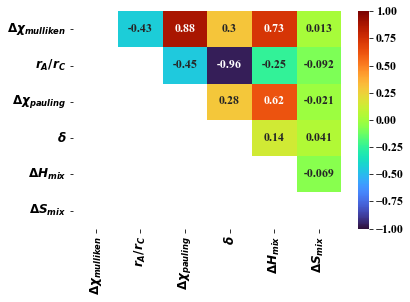

In [11]:
print(df.corr(method='pearson'))
mask=np.tril(np.ones_like(df.corr()))
dataplot = sns.heatmap(df.corr(), cmap="turbo", annot=True, vmin=-1, vmax=1, mask=mask)
positions = (0.5, 1.5, 2.5, 3.5, 4.5, 5.5)
positions2 = (0.5, 1.5, 2.5, 3.5, 4.5, 5.5)
labels = ("$\Delta \chi_{mulliken}$", "$r_A/r_C$", "$\Delta \chi_{pauling}$", "$\delta$", "$\Delta H_{mix}$", "$\Delta S_{mix}$")
plt.xticks(positions2, labels, fontsize= 12)
plt.yticks(positions, labels, fontsize= 12)
plt.savefig('Correlation matrix combined dataset new.JPG',dpi=600,bbox_inches='tight')

In [84]:
x=dataset[["ΔX mulliken", 'rA/rC', 'ΔX Pauling', 'Delta', 'ΔH mixing', 'ΔS mixing']]

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
sc=StandardScaler()
x=sc.fit_transform(x)

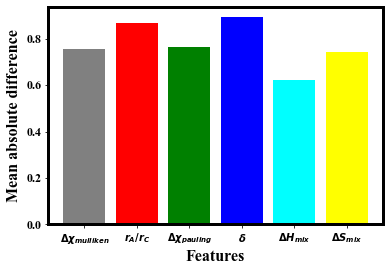

In [87]:
mean_abs_diff=np.sum(np.abs(x -np.mean(x, axis=0)), axis=0)/x.shape[0]
plt.bar(np.arange(x.shape[1]), mean_abs_diff, color=['grey', 'red', 'green', 'blue', 'cyan', 'yellow'])
plt.xlabel('Features',fontweight='bold',fontsize= 16)
plt.ylabel('Mean absolute difference',fontweight='bold',fontsize=16)
positions = (0, 0.2, 0.4, 0.6, 0.8)
positions2 = (0, 1, 2, 3, 4, 5)
labels = ("$\Delta \chi_{mulliken}$", "$r_A/r_C$", "$\Delta \chi_{pauling}$", "$\delta$", "$\Delta H_{mix}$", "$\Delta S_{mix}$")
plt.xticks(positions2, labels, fontsize= 10)
plt.yticks(positions, fontsize= 12)
plt.savefig('Feature selection MAD combined.JPG',dpi=600,bbox_inches='tight')

In [12]:
df2=dataset[["ΔX mulliken", 'rA/rC', 'ΔX Pauling', 'Delta', 'ΔH mixing', 'ΔS mixing', 'Phase formation']]
df2

,ΔX mulliken,rA/rC,ΔX Pauling,Delta,ΔH mixing,ΔS mixing,Phase formation
0,2.629500,0.437500,0.9280,0.063086,1.12,13.38,Single phase
1,2.624000,0.437500,0.9220,0.063086,-0.16,13.38,Single phase
2,2.543300,0.482759,0.9640,0.026537,-3.84,13.38,Single phase
3,2.533000,0.451613,1.0120,0.046064,-3.52,13.38,Single phase
4,2.629800,0.451613,1.0040,0.047429,-3.84,13.38,Single phase
...,...,...,...,...,...,...,...
287,2.099125,0.378378,0.7175,0.153609,-42.75,11.52,Multi phase
288,2.321625,0.500000,0.6550,0.030428,-22.25,11.52,Multi phase
289,2.414375,0.500000,0.6900,0.015890,-3.50,11.52,Multi phase
290,2.279875,0.482759,0.4825,0.040656,-6.00,11.52,Multi phase


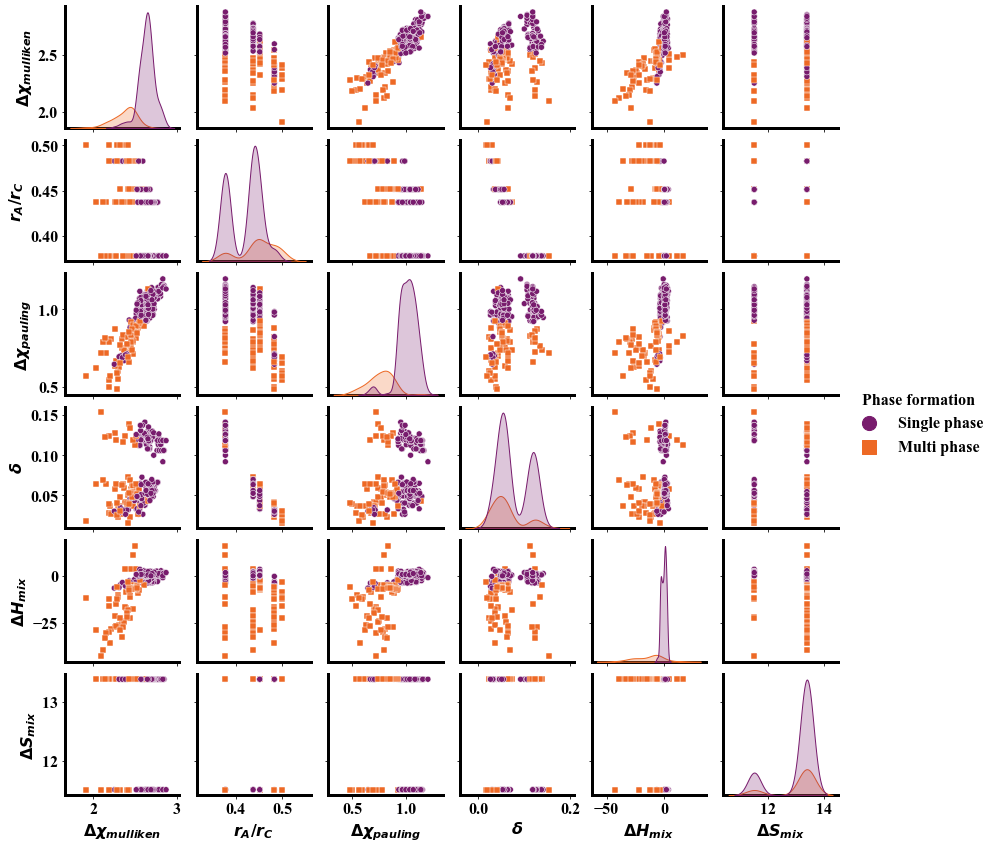

In [32]:
g=sns.pairplot(df2, hue= "Phase formation", height=2, palette="inferno", markers=["o", "s"], diag_kind="kde") 
replacement=({'ΔX mulliken': '$\Delta \chi_{mulliken}$', 'rA/rC':'$r_A/r_C$', 'ΔX Pauling':'$\Delta \chi_{pauling}$', 'Delta':'$\delta$' , 'ΔH mixing':'$\Delta H_{mix}$', 'ΔS mixing':'$\Delta S_{mix}$'})
for i in range(6):
    for j in range(6):
        xlabel=g.axes[i][j].get_xlabel()
        ylabel=g.axes[i][j].get_ylabel()
        if xlabel in replacement.keys():
            g.axes[i][j].set_xlabel(replacement[xlabel])
        if ylabel in replacement.keys():
            g.axes[i][j].set_ylabel(replacement[ylabel])
for legend in g._legend.legendHandles:
    legend.set_alpha(1)
    legend._sizes=[200]
plt.savefig('Scatterplot combinded data new.JPG',dpi=600,bbox_inches='tight')

In [93]:
df4 = pd.DataFrame(x, columns =['$\Delta \chi_{mulliken}$', '$r_A/r_C$', '$\Delta \chi_{pauling}$', '$\delta$', '$\Delta H_{mix}$', '$\Delta S_{mix}$'])

In [94]:
df4

,$\Delta \chi_{mulliken}$,$r_A/r_C$,$\Delta \chi_{pauling}$,$\delta$,$\Delta H_{mix}$,$\Delta S_{mix}$
0,0.332404,0.300345,-0.171399,-0.296205,0.587115,0.443533
1,0.296760,0.300345,-0.213822,-0.296205,0.427574,0.443533
2,-0.226242,1.528647,0.083139,-1.346809,-0.031105,0.443533
3,-0.292994,0.683364,0.422522,-0.785489,0.008780,0.443533
4,0.334348,0.683364,0.365958,-0.746262,-0.031105,0.443533
...,...,...,...,...,...,...
287,-3.104856,-1.304194,-1.659737,2.305858,-4.880889,-2.254625
288,-1.662876,1.996572,-2.101642,-1.234957,-2.325747,-2.254625
289,-1.061781,1.996572,-1.854175,-1.652832,0.011273,-2.254625
290,-1.933450,1.528647,-3.321301,-0.940954,-0.300330,-2.254625


In [ ]:
'$r_A/r_C$', '$\Delta \chi_{pauling}$', '$\delta$', '$\Delta H_{mix}$', '$\Delta S_{mix}$', '$AIC$']

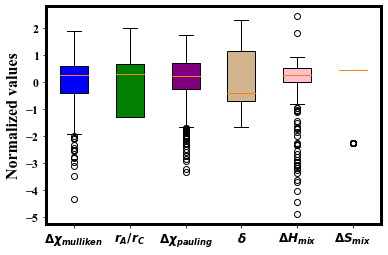

In [108]:
box = plt.boxplot(df4, patch_artist=True)
colors = ['blue', 'green', 'purple', 'tan', 'pink', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
positions2 = (1, 2, 3, 4, 5, 6)
plt.xticks(positions2, labels, fontsize= 12)
plt.ylabel('Normalized values',fontweight='bold',fontsize=16)
plt.savefig('Boxplot Features.JPG',dpi=600,bbox_inches='tight')

In [120]:
from imblearn.over_sampling import ADASYN
import sklearn
from sklearn.model_selection import train_test_split
from pandas import DataFrame

In [165]:
x=dataset[["ΔX mulliken", 'rA/rC', 'ΔX Pauling', 'Delta', 'ΔH mixing', 'ΔS mixing','AIC']]
y=dataset[["Phase formation"]]

In [166]:
x_train, x_test1,  y_train, y_test1=train_test_split(x, y, test_size=0.25, random_state=42)
train_set1=pd.concat([x_train, y_train], axis=1)
test_set1=pd.concat([x_test1, y_test1], axis=1)
test_set1
train_set1

,ΔX mulliken,rA/rC,ΔX Pauling,Delta,ΔH mixing,ΔS mixing,AIC,Phase formation
68,2.789700,0.378378,1.126,0.106109,-1.28,13.38,22.541850,Single phase
209,2.144100,0.378378,0.818,0.122829,-33.12,13.38,16.268030,Multi phase
37,2.554400,0.451613,1.072,0.040541,-3.36,13.38,21.245600,Single phase
16,2.730500,0.437500,1.002,0.060964,-1.60,13.38,19.584290,Single phase
289,2.414375,0.500000,0.690,0.015890,-3.50,11.52,13.056875,Multi phase
...,...,...,...,...,...,...,...,...
188,2.401600,0.482759,0.700,0.036949,-19.68,13.38,13.356840,Multi phase
71,2.571000,0.451613,0.924,0.046064,-2.24,13.38,18.062520,Single phase
106,2.726300,0.378378,1.020,0.128073,-2.08,13.38,20.151800,Single phase
270,2.657500,0.437500,1.040,0.064511,2.25,11.52,20.459375,Single phase


In [173]:
preada=dataset[["ΔX mulliken", 'Delta','Phase formation']]
preada

,ΔX mulliken,Delta,Phase formation
0,2.629500,0.063086,Single phase
1,2.624000,0.063086,Single phase
2,2.543300,0.026537,Single phase
3,2.533000,0.046064,Single phase
4,2.629800,0.047429,Single phase
...,...,...,...
287,2.099125,0.153609,Multi phase
288,2.321625,0.030428,Multi phase
289,2.414375,0.015890,Multi phase
290,2.279875,0.040656,Multi phase


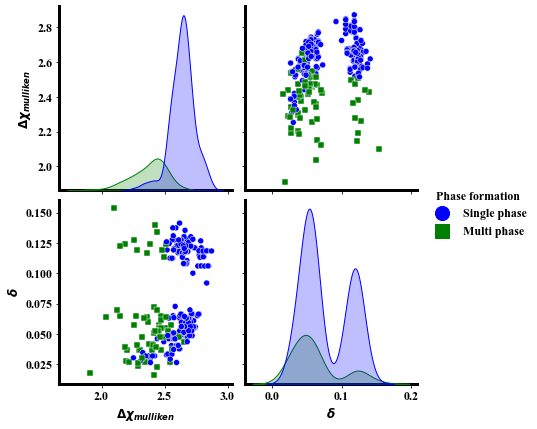

In [174]:
s=sns.pairplot(preada, hue= "Phase formation", height=3, palette=['blue', 'green'], markers=["o", "s"], diag_kind="kde") 
replacement=({'ΔX mulliken': '$\Delta \chi_{mulliken}$', 'Delta':'$\delta$'})
for i in range(2):
    for j in range(2):
        xlabel=s.axes[i][j].get_xlabel()
        ylabel=s.axes[i][j].get_ylabel()
        if xlabel in replacement.keys():
            s.axes[i][j].set_xlabel(replacement[xlabel])
        if ylabel in replacement.keys():
            s.axes[i][j].set_ylabel(replacement[ylabel])
for legend in s._legend.legendHandles:
    legend.set_alpha(1)
    legend._sizes=[200]
plt.savefig('Pre adasyn distribution.JPG',dpi=600,bbox_inches='tight')

In [3]:
dataada=pd.read_excel("All data after ADASYN.xlsx")
dataada

,Unnamed: 0,ΔX mulliken,rA/rC,ΔX Pauling,Delta,ΔH mixing,ΔS mixing,Phase formation
0,0,2.629500,0.437500,0.928000,0.063086,1.120000,13.380000,Single phase
1,1,2.624000,0.437500,0.922000,0.063086,-0.160000,13.380000,Single phase
2,2,2.543300,0.482759,0.964000,0.026537,-3.840000,13.380000,Single phase
3,3,2.533000,0.451613,1.012000,0.046064,-3.520000,13.380000,Single phase
4,4,2.629800,0.451613,1.004000,0.047429,-3.840000,13.380000,Single phase
...,...,...,...,...,...,...,...,...
444,444,2.333040,0.471549,0.616201,0.044990,-6.086375,12.189403,Multi phase
445,445,2.342851,0.482759,0.554122,0.040088,-6.613905,11.520000,Multi phase
446,446,2.296694,0.482759,0.501628,0.040504,-6.163954,11.520000,Multi phase
447,447,2.413066,0.482759,0.633977,0.039456,-7.298370,11.520000,Multi phase


In [171]:
postada=dataada[["ΔX mulliken", 'Delta','Phase formation']]
postada

,ΔX mulliken,Delta,Phase formation
0,2.629500,0.063086,Single phase
1,2.624000,0.063086,Single phase
2,2.543300,0.026537,Single phase
3,2.533000,0.046064,Single phase
4,2.629800,0.047429,Single phase
...,...,...,...
444,2.333040,0.044990,Multi phase
445,2.342851,0.040088,Multi phase
446,2.296694,0.040504,Multi phase
447,2.413066,0.039456,Multi phase


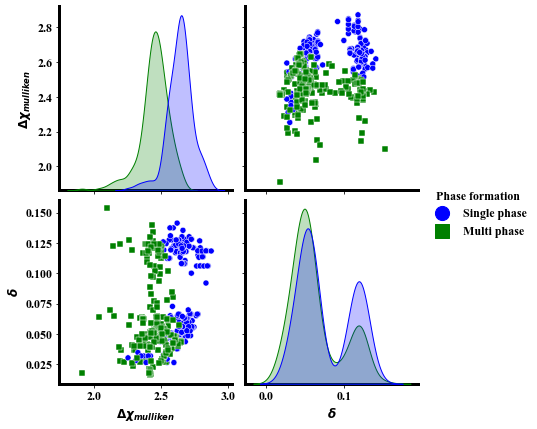

In [172]:
s=sns.pairplot(postada, hue= "Phase formation", height=3, palette=['blue', 'green'], markers=["o", "s"], diag_kind="kde") 
replacement=({'ΔX mulliken': '$\Delta \chi_{mulliken}$', 'Delta':'$\delta$'})
for i in range(2):
    for j in range(2):
        xlabel=s.axes[i][j].get_xlabel()
        ylabel=s.axes[i][j].get_ylabel()
        if xlabel in replacement.keys():
            s.axes[i][j].set_xlabel(replacement[xlabel])
        if ylabel in replacement.keys():
            s.axes[i][j].set_ylabel(replacement[ylabel])
for legend in s._legend.legendHandles:
    legend.set_alpha(1)
    legend._sizes=[200]
plt.savefig('Post adasyn distribution.JPG',dpi=600,bbox_inches='tight')

In [175]:
x2=dataada[["ΔX mulliken", 'rA/rC', 'ΔX Pauling', 'Delta', 'ΔH mixing', 'ΔS mixing']]
x2=sc.fit_transform(x2)
df6 = pd.DataFrame(x2, columns =['$\Delta \chi_{mulliken}$', '$r_A/r_C$', '$\Delta \chi_{pauling}$', '$\delta$', '$\Delta H_{mix}$', '$\Delta S_{mix}$'])

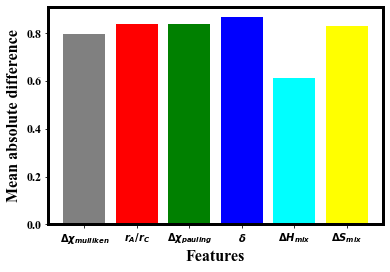

In [176]:
mean_abs_diff=np.sum(np.abs(x2 -np.mean(x2, axis=0)), axis=0)/x2.shape[0]
plt.bar(np.arange(x2.shape[1]), mean_abs_diff, color=['grey', 'red', 'green', 'blue', 'cyan', 'yellow'])
plt.xlabel('Features',fontweight='bold',fontsize= 16)
plt.ylabel('Mean absolute difference',fontweight='bold',fontsize=16)
positions = (0, 0.2, 0.4, 0.6, 0.8)
positions2 = (0, 1, 2, 3, 4, 5)
labels = ("$\Delta \chi_{mulliken}$", "$r_A/r_C$", "$\Delta \chi_{pauling}$", "$\delta$", "$\Delta H_{mix}$", "$\Delta S_{mix}$")
plt.xticks(positions2, labels, fontsize= 10)
plt.yticks(positions, fontsize= 12)
plt.savefig('Feature selection MAD training after adasyn.JPG',dpi=600,bbox_inches='tight')

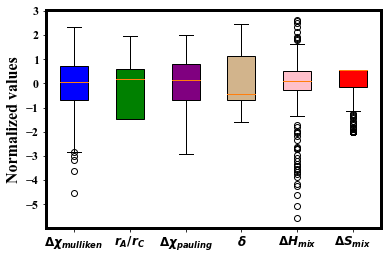

In [177]:
box = plt.boxplot(df6, patch_artist=True)
colors = ['blue', 'green', 'purple', 'tan', 'pink', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
positions2 = (1, 2, 3, 4, 5, 6)
plt.xticks(positions2, labels, fontsize= 12)
plt.ylabel('Normalized values',fontweight='bold',fontsize=16)
plt.savefig('Boxplot Features after adasyn.JPG',dpi=600,bbox_inches='tight')

In [150]:
df7=train_ada[["ΔX mulliken", 'rA/rC', 'ΔX Pauling', 'Delta', 'ΔH mixing', 'ΔS mixing']]
df7

,ΔX mulliken,rA/rC,ΔX Pauling,Delta,ΔH mixing,ΔS mixing
0,2.789700,0.378378,1.126000,0.106109,-1.280000,13.380000
1,2.144100,0.378378,0.818000,0.122829,-33.120000,13.380000
2,2.554400,0.451613,1.072000,0.040541,-3.360000,13.380000
3,2.730500,0.437500,1.002000,0.060964,-1.600000,13.380000
4,2.414375,0.500000,0.690000,0.015890,-3.500000,11.520000
...,...,...,...,...,...,...
326,2.610221,0.439685,1.065643,0.056827,2.090394,11.822934
327,2.565994,0.427872,0.999426,0.069863,2.427529,12.122968
328,2.383030,0.378378,0.724204,0.124248,4.088110,13.380000
329,2.480499,0.399506,0.806415,0.093379,11.597419,13.380000


In [11]:
df8=dataada[["ΔX mulliken", 'rA/rC', 'ΔX Pauling', 'Delta', 'ΔH mixing', 'ΔS mixing']]
df8
df9=dataada[["ΔX mulliken", 'rA/rC', 'ΔX Pauling', 'Delta', 'ΔH mixing', 'ΔS mixing', 'Phase formation']]

             ΔX mulliken     rA/rC  ΔX Pauling     Delta  ΔH mixing  ΔS mixing
ΔX mulliken     1.000000 -0.355551    0.884220  0.220429   0.558097   0.011073
rA/rC          -0.355551  1.000000   -0.356366 -0.965330  -0.322210  -0.278726
ΔX Pauling      0.884220 -0.356366    1.000000  0.197937   0.416876   0.001453
Delta           0.220429 -0.965330    0.197937  1.000000   0.222246   0.258059
ΔH mixing       0.558097 -0.322210    0.416876  0.222246   1.000000  -0.051047
ΔS mixing       0.011073 -0.278726    0.001453  0.258059  -0.051047   1.000000


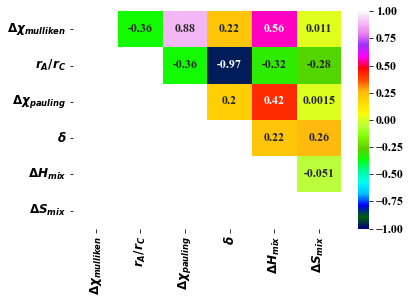

In [185]:
print(df8.corr(method='pearson'))
mask=np.tril(np.ones_like(df8.corr()))
dataplot = sns.heatmap(df8.corr(), cmap="gist_ncar", annot=True, vmin=-1, vmax=1, mask=mask)
positions = (0.5, 1.5, 2.5, 3.5, 4.5, 5.5)
positions2 = (0.5, 1.5, 2.5, 3.5, 4.5, 5.5)
labels = ("$\Delta \chi_{mulliken}$", "$r_A/r_C$", "$\Delta \chi_{pauling}$", "$\delta$", "$\Delta H_{mix}$", "$\Delta S_{mix}$")
plt.xticks(positions2, labels, fontsize= 12)
plt.yticks(positions, labels, fontsize= 12)
plt.savefig('Correlation matrix post adasyn training.JPG',dpi=600,bbox_inches='tight')

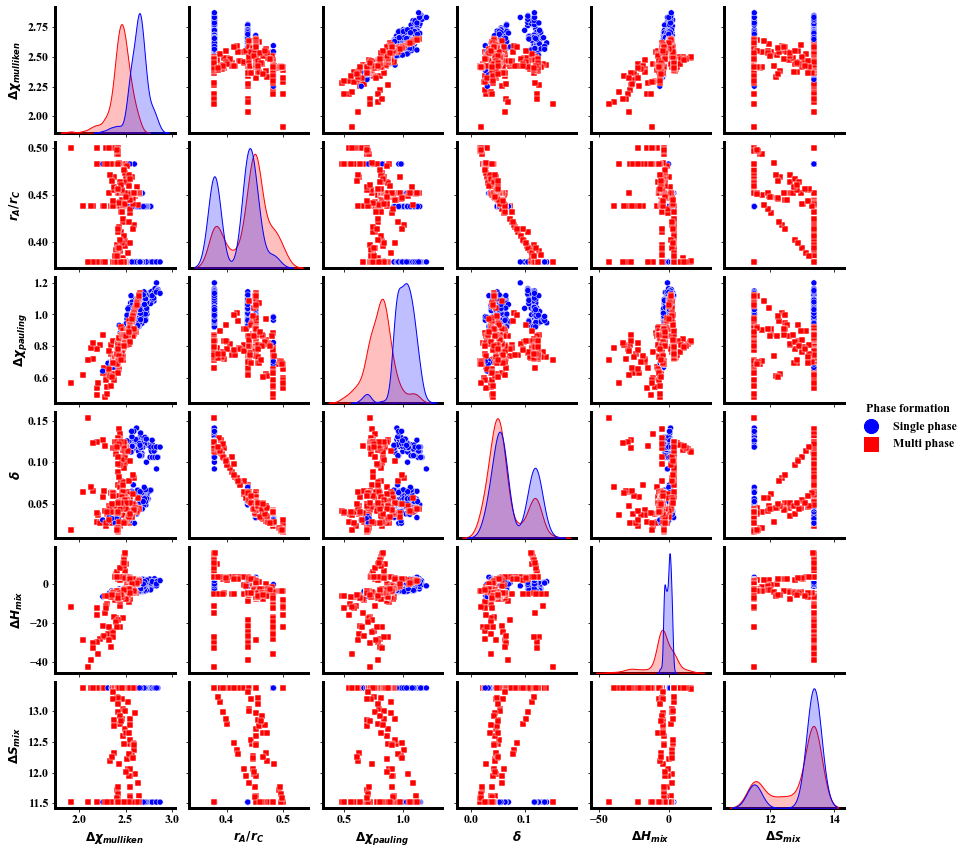

In [6]:
g=sns.pairplot(df9, hue= "Phase formation", height=2, palette=['blue', 'red'], markers=["o", "s"], diag_kind="kde") 
replacement=({'ΔX mulliken': '$\Delta \chi_{mulliken}$', 'rA/rC':'$r_A/r_C$', 'ΔX Pauling':'$\Delta \chi_{pauling}$', 'Delta':'$\delta$' , 'ΔH mixing':'$\Delta H_{mix}$', 'ΔS mixing':'$\Delta S_{mix}$'})
for i in range(6):
    for j in range(6):
        xlabel=g.axes[i][j].get_xlabel()
        ylabel=g.axes[i][j].get_ylabel()
        if xlabel in replacement.keys():
            g.axes[i][j].set_xlabel(replacement[xlabel])
        if ylabel in replacement.keys():
            g.axes[i][j].set_ylabel(replacement[ylabel])
for legend in g._legend.legendHandles:
    legend.set_alpha(1)
    legend._sizes=[200]
plt.savefig('Scatterplot ADASYNed data.JPG',dpi=600,bbox_inches='tight')

In [32]:
predcom=pd.read_excel("Prediction comparision.xlsx")
predcom

,ΔX Pauling,Delta,Phase formation,Predicted
0,0.694000,0.028169,Single phase,Single phase
1,0.826660,0.037227,Multi phase,Multi phase
2,1.078000,0.050907,Single phase,Single phase
3,0.958000,0.130144,Single phase,Single phase
4,1.044000,0.118010,Single phase,Single phase
...,...,...,...,...
108,0.821897,0.027882,Multi phase,Multi phase
109,1.050000,0.066407,Single phase,Single phase
110,0.855092,0.051170,Multi phase,Multi phase
111,0.793886,0.119388,Multi phase,Multi phase


In [33]:
df10=predcom[['ΔX Pauling', 'Delta','Predicted']]
df11=predcom[['ΔX Pauling', 'Delta', 'Phase formation']]

In [17]:
df11

,ΔX Pauling,Delta,Phase formation
0,0.694000,0.028169,Single phase
1,0.826660,0.037227,Multi phase
2,1.078000,0.050907,Single phase
3,0.958000,0.130144,Single phase
4,1.044000,0.118010,Single phase
...,...,...,...
108,0.821897,0.027882,Multi phase
109,1.050000,0.066407,Single phase
110,0.855092,0.051170,Multi phase
111,0.793886,0.119388,Multi phase


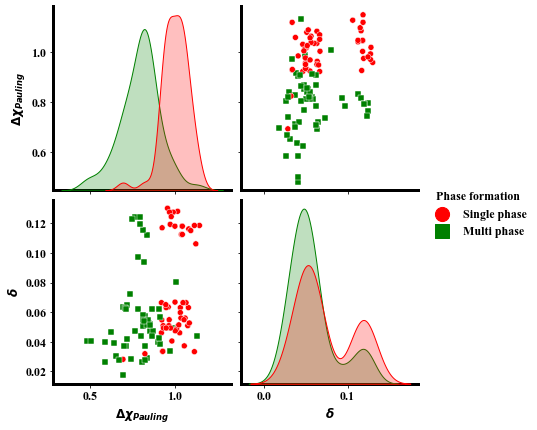

In [18]:
s=sns.pairplot(df11, hue= "Phase formation", height=3, palette=['red', 'green'], markers=["o", "s"], diag_kind="kde") 
replacement=({'ΔX Pauling': '$\Delta \chi_{Pauling}$', 'Delta':'$\delta$'})
for i in range(2):
    for j in range(2):
        xlabel=s.axes[i][j].get_xlabel()
        ylabel=s.axes[i][j].get_ylabel()
        if xlabel in replacement.keys():
            s.axes[i][j].set_xlabel(replacement[xlabel])
        if ylabel in replacement.keys():
            s.axes[i][j].set_ylabel(replacement[ylabel])
for legend in s._legend.legendHandles:
    legend.set_alpha(1)
    legend._sizes=[200]
#plt.savefig('True test data distribution.JPG',dpi=600,bbox_inches='tight')

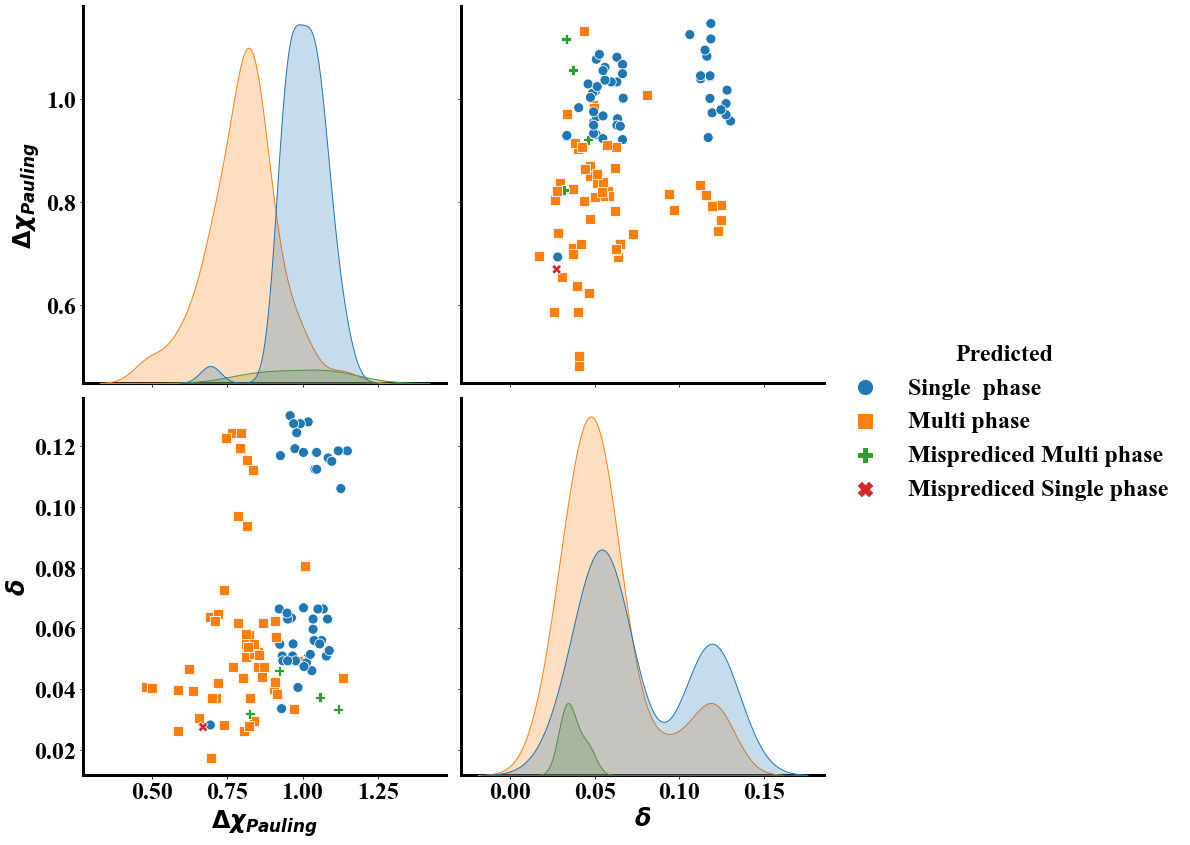

In [46]:
s=sns.pairplot(df10, hue= "Predicted", height=6, markers=["o", "s", "P", 'X'], diag_kind="kde", plot_kws={"s": 100}) 
replacement=({'ΔX Pauling': '$\Delta \chi_{Pauling}$', 'Delta':'$\delta$'})
for i in range(2):
    for j in range(2):
        xlabel=s.axes[i][j].get_xlabel()
        ylabel=s.axes[i][j].get_ylabel()
        if xlabel in replacement.keys():
            s.axes[i][j].set_xlabel(replacement[xlabel])
        if ylabel in replacement.keys():
            s.axes[i][j].set_ylabel(replacement[ylabel])
for legend in s._legend.legendHandles:
    legend.set_alpha(1)
    legend._sizes=[200]
plt.savefig('Prediction comparision.JPG',dpi=600,bbox_inches='tight')

In [4]:
Initial=pd.read_excel("Initial_1.xlsx", sheet_name='Sheet2')
Initial

,Elements,Metallic radius,ΔX (Paulling),X (Paulling),ΔP-rad,ΔX (Mulliken),rA/rC,Ionic radius,AIC,MC type
0,Cr,128.0,0.89,1.66,1.800,3.7225,0.500000,1.40,17.01235,Yes
1,V,134.0,0.92,1.63,1.790,3.6385,0.518519,1.35,17.68240,Yes
2,Ru,134.0,0.35,2.20,1.965,4.2030,0.538462,1.30,6.02875,Yes
3,Mo,139.0,0.39,2.16,2.080,3.9185,0.482759,1.45,6.77235,No
4,W,139.0,0.19,2.36,2.095,4.3380,0.518519,1.35,3.16635,Yes
5,Nb,146.0,0.95,1.60,2.120,3.8385,0.482759,1.45,18.35875,Yes
6,Ta,146.0,1.05,1.50,2.150,3.9365,0.482759,1.45,20.65875,Yes
7,Ti,147.0,1.01,1.54,1.940,3.4525,0.500000,1.40,19.73035,Yes
8,Hf,159.0,1.25,1.30,2.270,3.5040,0.451613,1.55,25.46875,Yes
9,Zr,160.0,1.22,1.33,2.185,3.5315,0.451613,1.55,24.72940,Yes


In [4]:
lit=pd.read_excel("Literature data.xlsx")
lit

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,ΔX mulliken,rA/rC,ΔX Pauling,Delta,ΔH mix,ΔS mixing,Phase formation,AIC,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,3249,Ti,Zr,Nb,Ta,Mo,2.5255,0.451613,0.924,0.033555,-1.76,13.38,Single,18.04992,NaN,NaN,https://doi.org/10.1021/acs.inorgchem.0c03319
1,2038,Hf,Ta,Nb,Ti,V,2.5870,0.451613,1.036,0.046064,0.64,13.38,Single,20.37980,NaN,NaN,https://doi.org/10.1007/s10853-021-06004-y
2,1873,Ta,Nb,Ti,V,W,2.4202,0.482759,0.824,0.031944,-3.68,13.38,Single,15.91932,NaN,NaN,https://doi.org/10.1007/s10853-021-06004-y
3,80,Cr,Nb,Mo,V,W,2.3698,0.482759,0.668,0.031944,-3.84,13.38,Single,12.59844,NaN,NaN,https://doi.org/10.1016/j.matlet.2021.131363
4,1653,Mo,Nb,Ta,V,W,2.3270,0.482759,0.700,0.034745,-4.64,13.38,Single,13.32772,NaN,NaN,NaN
5,3908,Hf,Nb,Ta,Ti,Zr,2.6084,0.451613,1.096,0.040541,2.72,13.38,Single,21.78920,NaN,NaN,NaN
6,1709,Hf,Mo,Nb,Ta,V,2.4938,0.451613,0.912,0.043618,-1.92,13.38,Single,17.78820,NaN,NaN,NaN
7,3698,Hf,Ta,Ti,W,Zr,2.5085,0.451613,0.944,0.054795,-3.36,13.38,Single,18.75072,NaN,NaN,NaN
8,3136,Hf,Mo,Ta,W,Zr,2.4153,0.451613,0.820,0.050907,-4.96,13.38,Multi,16.15912,NaN,NaN,NaN
9,3164,Hf,Mo,Ti,W,Zr,2.5121,0.451613,0.812,0.054795,-5.60,13.38,Multi,15.97344,NaN,NaN,NaN


In [5]:
df3=lit[["ΔX Pauling", 'ΔH mix', 'Phase formation']]
df3

,ΔX Pauling,ΔH mix,Phase formation
0,0.924,-1.76,Single
1,1.036,0.64,Single
2,0.824,-3.68,Single
3,0.668,-3.84,Single
4,0.700,-4.64,Single
5,1.096,2.72,Single
6,0.912,-1.92,Single
7,0.944,-3.36,Single
8,0.820,-4.96,Multi
9,0.812,-5.60,Multi


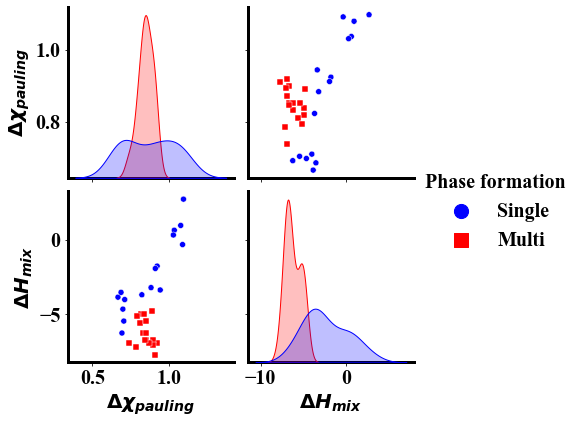

In [7]:
s=sns.pairplot(df3, hue= "Phase formation", height=3, palette=['blue', 'red'], markers=["o", "s"], diag_kind="kde") 
replacement=({'ΔX Pauling':'$\Delta \chi_{pauling}$', 'ΔH mix':'$\Delta H_{mix}$'})
for i in range(2):
    for j in range(2):
        xlabel=s.axes[i][j].get_xlabel()
        ylabel=s.axes[i][j].get_ylabel()
        if xlabel in replacement.keys():
            s.axes[i][j].set_xlabel(replacement[xlabel])
        if ylabel in replacement.keys():
            s.axes[i][j].set_ylabel(replacement[ylabel])
for legend in s._legend.legendHandles:
    legend.set_alpha(1)
    legend._sizes=[200]
plt.savefig('Literature data quinary carbide.JPG',dpi=600,bbox_inches='tight')